In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
def convert_dict(dict_i):
    conv = {}
    for type_exp, d1 in dict_i.items():
        for type_gen,d2 in d1.items():
            if type_gen not in conv:
                conv[type_gen] = {}
            conv[type_gen][type_exp]=  {float(k):v for k,v in d2.items()}
    return conv

In [3]:
def load_json(filename):
    import json
    with open(
        filename,
        "r",
    ) as fp:
        dict_i = json.load(fp)  
    return dict_i

In [4]:
def abbreviateValue(value, abbreviations={}):
    for k, v in abbreviations.items():
        if k in value:
            
            value = value.replace(k, v)
    #TODO
    if value[0:2] not in ["q_", "u_"]:
        value = value.replace("_", " ")
    return value
    
def abbreviate_dict_value(input_dict, abbreviations):
    
    conv ={}
    for k1, dict_i in input_dict.items():
        conv[k1] = { abbreviateValue(k, abbreviations): d for k, d in dict_i.items()}
    return conv

In [5]:
import os

output_fig_dir = os.path.join(os.path.curdir, "output_figures", "figures", "output_performance_reference")
from pathlib import Path

Path(output_fig_dir).mkdir(parents=True, exist_ok=True)

In [6]:
name_folder_output = "output_taxonomies_ratio"

In [7]:
compute_ratios = True

In [8]:
compute_results = True

In [9]:
if compute_results:
    from experiments_adult_trees_taxonomies_ratio import run_adult_experiments_trees_taxonomies

    run_adult_experiments_trees_taxonomies(
        name_output_dir="results",
        type_experiments=["one_at_time", "all_attributes"],
        type_criterion="weighted_sum_abs_reference_s",
        min_support_tree=0.1,
        metrics=["d_outcome"],
        verbose=False,
        ouput_folder_dir=name_folder_output,
        compute_ratios = compute_ratios
        
    )

True
1 10000
1 10000
2 20000
3 30000
4 40000
1 10000
output_taxonomies_ratio/results/adult_income_taxonomy/weighted_sum_abs_reference_s/stree_0.1/d_outcome/gain_0/info_ALL_ratio_min.json
output_taxonomies_ratio/results/adult_income_taxonomy/weighted_sum_abs_reference_s/stree_0.1/d_outcome/gain_0/info_ALL_ratio_max.json
output_taxonomies_ratio/results/adult_income_taxonomy/weighted_sum_abs_reference_s/stree_0.1/d_outcome/gain_0/info_ALL_wlogr_min.json
output_taxonomies_ratio/results/adult_income_taxonomy/weighted_sum_abs_reference_s/stree_0.1/d_outcome/gain_0/info_ALL_wlogr_max.json


In [10]:
import os

output_fig_dir = os.path.join(os.path.curdir, "output_taxonomies", "figures", "output_performance")
from pathlib import Path

Path(output_fig_dir).mkdir(parents=True, exist_ok=True)

# Read data

In [35]:
gains_names = {"weighted_sum_abs_reference_s":"g$\\Delta$",
                 "entropy":"gEntr"}
trees_names = {"one_at_time":"indiv", 
               "all_attributes":"comb"}
gen_names = {"without_gen": "base", "with_gen": "generalized"}

abbr = {}
abbr.update(gains_names)
abbr.update(trees_names)
abbr.update(gen_names)

In [36]:
abbreviations = {"continuous":"c", \
                 "quantile": "quant #bins:", "uniform":"unif #bins:"}
abbreviations.update(abbr)

In [37]:
q_abbr = abbreviations["quantile"]
u_abbr = abbreviations["uniform"]

In [38]:
label_names = { "quantile": "q", "uniform":"u",}
label_names.update(abbr)

In [39]:
label_names_2 = {"continuous":"c", "quantile": "q", "uniform":"u"}
label_names_2.update(abbr)

In [40]:
tree_keys = ['weighted_sum_abs_reference_s_one_at_time', 'weighted_sum_abs_reference_s_all_attributes', 'entropy_one_at_time', 'entropy_all_attributes']
tree_keys = [abbreviateValue(k, abbreviations) for k in tree_keys]

In [41]:
info = {}

In [42]:
min_sup_tree = 0.1

metric= "d_outcome"
type_criterion = "weighted_sum_abs_reference_s"

type_criterions = ["weighted_sum_abs_reference_s"]
dataset_name = "adult_income_taxonomy"
import os
output_results= os.path.join(os.path.curdir, name_folder_output, "results")

In [43]:
import os

info_tree = {type_criterion:{} for type_criterion in type_criterions}

info_ex_discr = {}

for info_i in ["max", "FP"]:

    for type_criterion in type_criterions:
        print(type_criterion)
        filename = os.path.join(output_results, dataset_name ,type_criterion,f"stree_{min_sup_tree}", metric, "gain_0",  f"info_ALL_{info_i}.json")

        info_tree[type_criterion][info_i] = abbreviate_dict_value(convert_dict(load_json(filename)), abbreviations)

weighted_sum_abs_reference_s
weighted_sum_abs_reference_s


In [47]:
for info_i in info:
    for type_gen in info[info_i]:
        if "all_c" in info[info_i][type_gen]:
            info[info_i][type_gen].pop("all_c")

In [48]:
color_labels = {}
color_labels[abbreviateValue('weighted_sum_abs_reference_s_one_at_time', abbreviations)]="orangered"
color_labels[abbreviateValue('weighted_sum_abs_reference_s_all_attributes', abbreviations)]="orange"
color_labels['user']="crimson"

In [49]:
save_fig = False

In [50]:
type_gens = ["without_gen", "with_gen"]

In [51]:
info_i="max"

info_dicts = {}

info_plot_max = {type_gen:{} for type_gen in type_gens}
for type_gen in type_gens:
        
    for type_criterion in type_criterions:
        info_plot_max[type_gen].update({abbreviateValue(f"{type_criterion}_{type_exp}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items()})

In [52]:
def select_keys(dict_i, keys_sel):
    return {k:dict_i[k] for k in keys_sel if k in dict_i}

# Plot max \Delta_income

In [54]:
save_fig = True

./output_taxonomies/figures/output_performance/adult_income_taxonomy_stree_0.1_d_outcome_max_tree_all.pdf


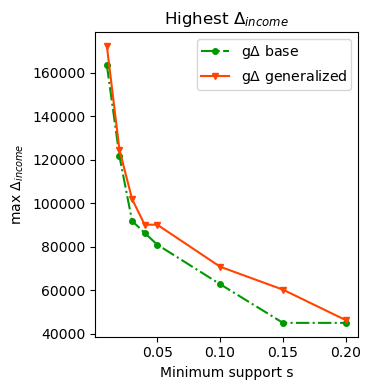

In [58]:
info_i = "max"




color_labels = {}
#color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#7fcc7f"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#009900"


#color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["with_gen"]}', abbreviations)]="mediumblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["with_gen"]}', abbreviations)]="orangered"
#color_labels[abbreviateValue(f'entropy_all_attributes {label_names_2["with_gen"]}', abbreviations)]="royalblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_all_attributes {label_names_2["with_gen"]}', abbreviations)]="orange"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["weighted_sum_abs_reference_s"] in k)})



size_fig = (3.8,4)
remove_combined = True

info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        if remove_combined:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v  and type_exp!=abbreviations["all_attributes"]})
        else:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v})

        
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_all.pdf")
print(figure_name)

info_plot = {k.replace(f'{abbreviations["one_at_time"]} ', ""):v for k,v in info_plot.items()}
color_labels = {k.replace(f'{abbreviations["one_at_time"]} ', ""):v for k,v in color_labels.items()}
lines_style = {k.replace(f'{abbreviations["one_at_time"]} ', ""):v for k,v in lines_style.items()}

from utils_plot import plotDicts

plotDicts(info_plot, marker=True, \
          linestyle=lines_style, sizeFig=size_fig, title="Highest $\Delta_{income}$", #yscale="log",
          xlabel="Minimum support s",  ylabel="max $\Delta_{income}$", labelSize=10.2,
          outside=False, color_labels=color_labels, saveFig=True, nameFig = figure_name)

# Plot FP

./output_taxonomies/figures/output_performance/adult_income_taxonomy_stree_0.1_d_outcome_FP_tree_all.pdf


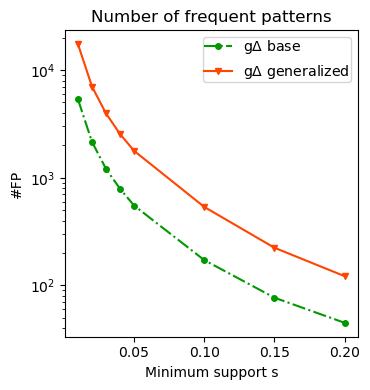

In [56]:
info_i = "FP"


color_labels = {}
color_labels[abbreviateValue(f'entropy_one_at_time {abbreviations["without_gen"]}', abbreviations)]="#7fcc7f"
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {abbreviations["without_gen"]}', abbreviations)]="#009900"


color_labels[abbreviateValue(f'entropy_one_at_time {abbreviations["with_gen"]}', abbreviations)]="mediumblue"
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {abbreviations["with_gen"]}', abbreviations)]="orangered"
color_labels[abbreviateValue(f'entropy_all_attributes {abbreviations["with_gen"]}', abbreviations)]="royalblue"
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_all_attributes {abbreviations["with_gen"]}', abbreviations)]="orange"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["weighted_sum_abs_reference_s"] in k)})


size_fig = (3.8,4)
remove_combined = True

info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        if remove_combined:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v and type_exp!=abbreviations["all_attributes"]})
        else:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v})

        
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_all.pdf")
print(figure_name)

info_plot = {k.replace(f'{abbreviations["one_at_time"]} ', ""):v for k,v in info_plot.items()}
color_labels = {k.replace(f'{abbreviations["one_at_time"]} ', ""):v for k,v in color_labels.items()}
lines_style = {k.replace(f'{abbreviations["one_at_time"]} ', ""):v for k,v in lines_style.items()}

    
from utils_plot import plotDicts

plotDicts(info_plot,  marker=True, \
          linestyle=lines_style, title="Number of frequent patterns",
          xlabel="Minimum support s",  ylabel="#FP",
          yscale="log", sizeFig=size_fig, labelSize=10.2,
          outside=False, color_labels=color_labels, borderpad=0.05, saveFig=True, nameFig = figure_name)

# Ratio

In [33]:
info = {}

In [34]:
min_sup_tree = 0.1

metric= "d_outcome"
type_criterion = "weighted_sum_abs_reference_s"

type_criterions = ["weighted_sum_abs_reference_s"]
dataset_name = "adult_income_taxonomy"
import os
output_results= os.path.join(os.path.curdir, name_folder_output, "results")

In [35]:
import os

info_tree = {type_criterion:{} for type_criterion in type_criterions}

info_ex_discr = {}

for info_i in ["max", "min"]:
    for type_criterion in type_criterions:
        for ratio_type in ["ratio", "wlogr"]:
            filename = os.path.join(output_results, dataset_name ,type_criterion,f"stree_{min_sup_tree}", metric, "gain_0",  f"info_ALL_{ratio_type}_{info_i}.json")
            if ratio_type not in info_tree[type_criterion]:
                info_tree[type_criterion][ratio_type] = {}
            info_tree[type_criterion][ratio_type][info_i] = abbreviate_dict_value(convert_dict(load_json(filename)), abbreviations)

./output_taxonomies/figures/output_performance/adult_income_taxonomy_stree_0.1_d_outcome_wlogr_max_tree_all.pdf


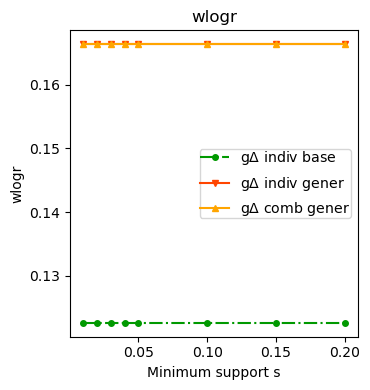

In [42]:
info_i = "FP"


color_labels = {}
color_labels[abbreviateValue(f'entropy_one_at_time {abbreviations["without_gen"]}', abbreviations)]="#7fcc7f"
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {abbreviations["without_gen"]}', abbreviations)]="#009900"


color_labels[abbreviateValue(f'entropy_one_at_time {abbreviations["with_gen"]}', abbreviations)]="mediumblue"
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {abbreviations["with_gen"]}', abbreviations)]="orangered"
color_labels[abbreviateValue(f'entropy_all_attributes {abbreviations["with_gen"]}', abbreviations)]="royalblue"
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_all_attributes {abbreviations["with_gen"]}', abbreviations)]="orange"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( abbreviations["without_gen"] in k and abbreviations["weighted_sum_abs_reference_s"] in k)})


size_fig = (3.8,4)


measure = "wlogr"
info_i = "max"



info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        info_plot.update(
        {abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v 
                     for type_exp, v in info_tree[type_criterion][measure][info_i][type_gen].items() if v})

        
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{measure}_{info_i}_tree_all.pdf")
print(figure_name)

    
from utils_plot import plotDicts

plotDicts(info_plot,  marker=True, \
          linestyle=lines_style, title=measure,
          xlabel="Minimum support s",  ylabel=measure,  sizeFig=size_fig, labelSize=10.2,
          outside=False, color_labels=color_labels, borderpad=0.05, saveFig=True, nameFig = figure_name)